FULL

✅ Đã import thư viện và thiết lập cấu hình
🔄 Đang load dữ liệu công suất...
✅ Đã load 10656 bản ghi
Dữ liệu mẫu:                  Time  P_uoc  P_uoc_normalized
0 2025-01-01 00:00:00    0.0               0.0
1 2025-01-01 00:10:00    0.0               0.0
2 2025-01-01 00:20:00    0.0               0.0
3 2025-01-01 00:30:00    0.0               0.0
4 2025-01-01 00:40:00    0.0               0.0
Lookup mẫu: {Timestamp('2025-01-01 00:00:00'): 0.0, Timestamp('2025-01-01 00:10:00'): 0.0, Timestamp('2025-01-01 00:20:00'): 0.0, Timestamp('2025-01-01 00:30:00'): 0.0, Timestamp('2025-01-01 00:40:00'): 0.0}

🔄 Đang xử lý ảnh thành chuỗi dữ liệu multi-channel...
✅ Đã xử lý 10279 chuỗi ảnh
Shape của sequences_images: (10279, 12, 32, 32, 4)
Mẫu đầu tiên (min, max): -1.0 1.0


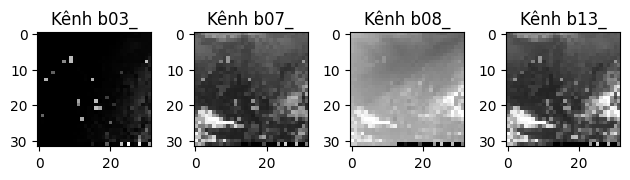

Thời gian mẫu: ['2025-01-01 01:50', '2025-01-01 02:00', '2025-01-01 02:10', '2025-01-01 02:20', '2025-01-01 02:30']

🔄 Đang ghép dữ liệu ảnh với P_uoc...

Ví dụ đầu vào và đầu ra:
P_uoc đầu vào: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
P_uoc đầu ra: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001786966200618725, 0.0018001884053905303, 0.0018010678204852138, 0.001828765954668266]
✅ Dataset đã sẵn sàng với 10279 mẫu
✅ Mô hình đã được build
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 12, 32, 32, 4)]      0         []                            
                                                                                                  
 time_distributed_8 (TimeDi  (None, 12, 30, 30, 32)       1184    

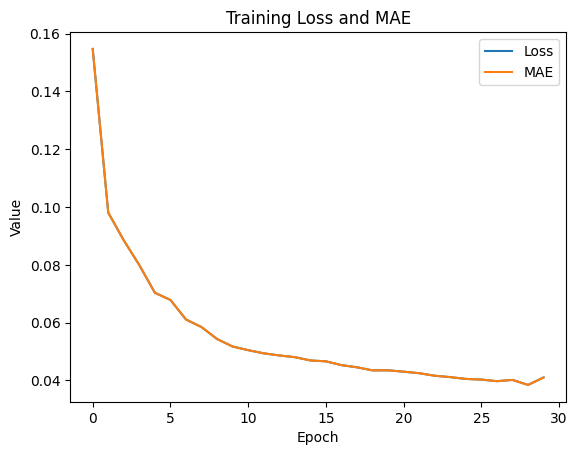


🔄 Đang xử lý ảnh thành chuỗi dữ liệu multi-channel...
✅ Đã xử lý 388 chuỗi ảnh
Shape của sequences_images: (388, 12, 32, 32, 4)
Mẫu đầu tiên (min, max): -1.0 1.0

🔄 Đang ghép dữ liệu ảnh với P_uoc...

Ví dụ đầu vào và đầu ra:
P_uoc đầu vào: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
P_uoc đầu ra: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001786966200618725, 0.0018001884053905303, 0.0018010678204852138, 0.001828765954668266]
✅ Dataset đã sẵn sàng với 388 mẫu
4/4 [==============================] - 0s 44ms/step - loss: 0.0679 - mae: 0.0679
✅ Test Loss: 0.06790724396705627
✅ Test MAE: 0.06790724396705627
4/4 [==============================] - 0s 43ms/step


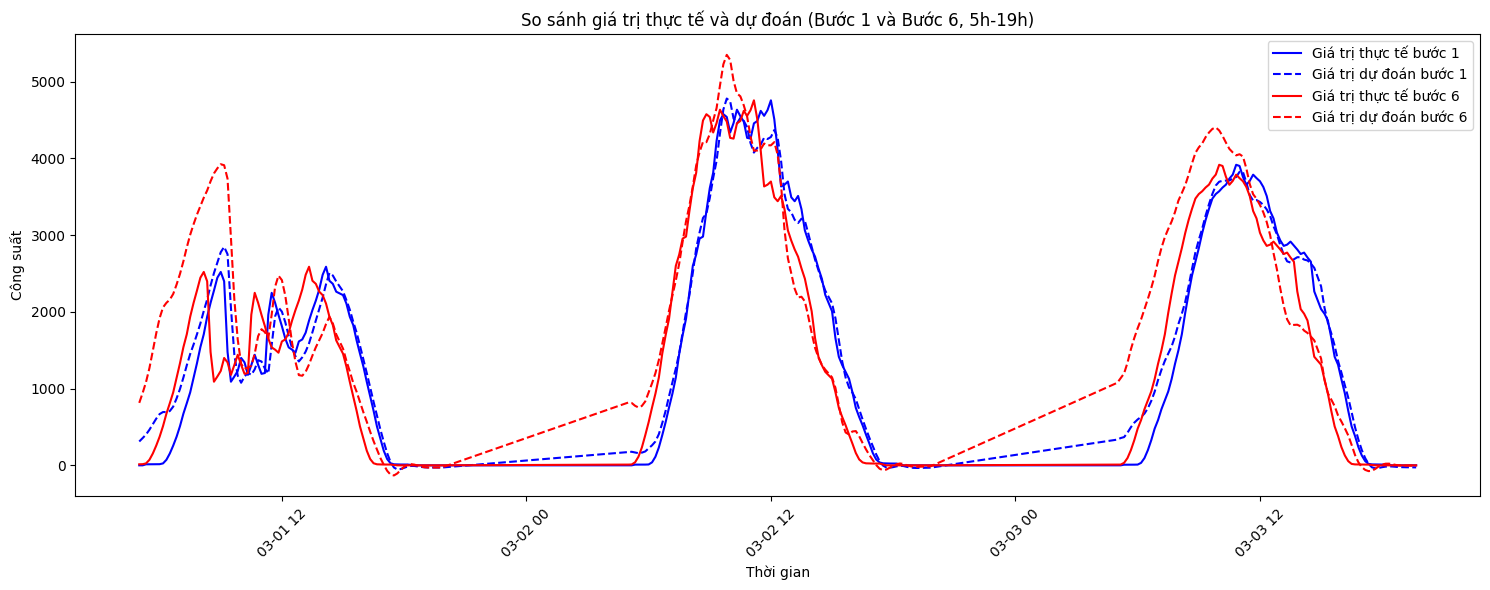

✅ Sai số phần trăm (MAPE) bước 1: 306.32%
✅ Sai số phần trăm (MAPE) bước 6: 416.45%


In [8]:
# %% Cell 1: Import thư viện và cài đặt
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.path.append('P:/7. User/Tuong')

from DB_ALL import SQL_NLTT_NOIBO, Database_TTD

PATH = r"Z:\Sky-image\Data"
POWER_CSV = r"E:\namnvn\H9\Solar_Power_Forecast\data\P_uoc.csv"
SEQ_LENGTH = 12
PRED_LENGTH = 24
IMG_SIZE = (32, 32)
NUM_CHANNELS = 4
BATCH_SIZE = 128
EPOCHS = 30

START_DATE = datetime.datetime(2025, 1, 1)
END_DATE = datetime.datetime(2025, 3, 15)

print("✅ Đã import thư viện và thiết lập cấu hình")


# %% Cell 2: Xử lý dữ liệu công suất
print("🔄 Đang load dữ liệu công suất...")
# power_df = pd.read_csv(POWER_CSV)
db = SQL_NLTT_NOIBO()
start_date = '2025-01-01'
end_date = '2025-03-15'
# If no end_date provided, query for a single day
df = pd.DataFrame.from_records(db.query(f"""
select NGAY, ID_CHUKY, SUM(P_VALUE) as P from NLTT_REALTIME_LOAIHINH_HIS nrnh 
WHERE NGAY >= '{start_date}' AND NGAY <= '{end_date}' and ID_LOAIHINH = 9
GROUP by NGAY, ID_CHUKY 
ORDER by NGAY, ID_CHUKY
"""), columns=['NGAY', 'ID_CHUKY','P'])

# Create full datetime by combining date and time derived from ID_CHUKY
df["NGAY"] = pd.to_datetime(df["NGAY"])
df["TIME"] = df["NGAY"] + pd.to_timedelta((df["ID_CHUKY"] - 1) * 5, unit='m')
df = df[["TIME", "P"]]
df.rename(columns={"TIME": "Time", "P": "P_uoc"}, inplace=True)
# resample to 10 minutes
df = df.set_index("Time").resample('10T').mean()

power_df = df.reset_index()
power_df['Time'] = pd.to_datetime(power_df['Time'])
scaler = MinMaxScaler()
power_df['P_uoc_normalized'] = scaler.fit_transform(power_df[['P_uoc']])
power_lookup = power_df.set_index('Time')['P_uoc_normalized'].to_dict()
print(f"✅ Đã load {len(power_df)} bản ghi")

print("Dữ liệu mẫu:", power_df.head())
print("Lookup mẫu:", {k: power_lookup[k] for k in list(power_lookup.keys())[:5]})


# %% Cell 3.1: Xử lý ảnh thành chuỗi dữ liệu multi-channel
def load_and_process_image(path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False)
        img = tf.image.resize(img, IMG_SIZE)
        img = (img / 127.5) - 1.0
        return img.numpy()
    except:
        return np.zeros(IMG_SIZE + (1,), dtype=np.float32)

def preprocess_images(image_records_dict):
    print("\n🔄 Đang xử lý ảnh thành chuỗi dữ liệu multi-channel...")
    prefixes = ['b03_', 'b07_', 'b08_', 'b13_']
    sequences_images = []
    sequences_times = []
    
    # Tìm thời gian chung
    times = set.intersection(*(set(dt for _, dt in image_records_dict[prefix]) for prefix in prefixes))
    times = sorted(times)
    min_length = len(times) - SEQ_LENGTH - PRED_LENGTH + 1
    
    for i in range(max(0, min_length)):
        time_window = times[i:i+SEQ_LENGTH]
        if len(time_window) != SEQ_LENGTH:  # Bỏ qua nếu không đủ SEQ_LENGTH
            continue
        multi_channel_seq = []
        for prefix in prefixes:
            channel_seq = []
            for t in time_window:
                path = next((p for p, dt in image_records_dict[prefix] if dt == t), None)
                img = load_and_process_image(path) if path else np.zeros(IMG_SIZE + (1,), dtype=np.float32)
                channel_seq.append(img.squeeze())  # Loại bỏ chiều (1)
            multi_channel_seq.append(channel_seq)
        # Stack thành (SEQ_LENGTH, 32, 32, 4)
        stacked_seq = np.stack(multi_channel_seq, axis=-1)
        sequences_images.append(stacked_seq)
        sequences_times.append(time_window[-1])
    
    sequences_images = np.array(sequences_images)
    print(f"✅ Đã xử lý {len(sequences_images)} chuỗi ảnh")
    print("Shape của sequences_images:", sequences_images.shape)
    if sequences_images.size > 0:
        print("Mẫu đầu tiên (min, max):", sequences_images[0].min(), sequences_images[0].max())
    return sequences_images, sequences_times

# Tạo image_records
date_dirs = [d.strftime("%Y%m%d") for d in pd.date_range(START_DATE, END_DATE)]
image_records_dict = {'b03_': [], 'b07_': [], 'b08_': [], 'b13_': []}
for date_dir in date_dirs:
    date_path = os.path.join(PATH, date_dir)
    if os.path.exists(date_path):
        for time_dir in os.listdir(date_path):
            time_path = os.path.join(date_path, time_dir)
            if os.path.isdir(time_path):
                try:
                    dt = datetime.datetime.strptime(f"{date_dir}T{time_dir}", "%Y%m%dT%H%M")
                    for file in os.listdir(time_path):
                        for prefix in image_records_dict.keys():
                            if file.lower().startswith(prefix) and file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                                img_path = os.path.join(time_path, file)
                                image_records_dict[prefix].append((img_path, dt))
                except:
                    continue

for prefix in image_records_dict:
    image_records_dict[prefix].sort(key=lambda x: x[1])

sequences_images_processed, sequences_times = preprocess_images(image_records_dict)

# Kiểm tra
if sequences_images_processed.size > 0:
    for i, prefix in enumerate(['b03_', 'b07_', 'b08_', 'b13_']):
        plt.subplot(1, 4, i+1)
        plt.imshow(sequences_images_processed[0][0, :, :, i], cmap='gray')
        plt.title(f"Kênh {prefix}")
    plt.tight_layout()
    plt.show()
    print("Thời gian mẫu:", [t.strftime('%Y-%m-%d %H:%M') for t in sequences_times[:5]])
else:
    print("⚠️ Không có chuỗi ảnh nào được tạo!")


    # %% Cell 3.2: Ghép với P_uoc và tạo dataset
def prepare_dataset_with_processed_images(sequences_images_processed, sequences_times):
    print("\n🔄 Đang ghép dữ liệu ảnh với P_uoc...")
    sequences_p_uoc = []
    targets = []
    valid_sequences_images = []
    valid_sequences_times = []
    for i, (img_seq, seq_time) in enumerate(zip(sequences_images_processed, sequences_times)):
        start_idx = i
        p_uoc_seq = [power_lookup.get(image_records_dict['b03_'][start_idx + j][1], 0.0) for j in range(SEQ_LENGTH)]
        target_dts = [image_records_dict['b03_'][start_idx + SEQ_LENGTH + j][1] for j in range(PRED_LENGTH)]
        target_powers = [power_lookup.get(dt, -1.0) for dt in target_dts]
        if all(power != -1.0 for power in target_powers):
            valid_sequences_images.append(img_seq)
            sequences_p_uoc.append(p_uoc_seq)
            targets.append(target_powers)
            valid_sequences_times.append(seq_time)
    
    print("\nVí dụ đầu vào và đầu ra:")
    print("P_uoc đầu vào:", sequences_p_uoc[0])
    print("P_uoc đầu ra:", targets[0])
    
    ds = tf.data.Dataset.from_tensor_slices((
        (np.array(valid_sequences_images), np.array(sequences_p_uoc)),
        np.array(targets)
    ))
    ds = ds.map(lambda x, y: ((x[0], x[1]), y), num_parallel_calls=tf.data.AUTOTUNE)
    final_ds = ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    print(f"✅ Dataset đã sẵn sàng với {len(valid_sequences_images)} mẫu")
    return final_ds, valid_sequences_times

dataset, sequences_times_train = prepare_dataset_with_processed_images(sequences_images_processed, sequences_times)

# %% Cell 4: Định nghĩa mô hình
def build_model():
    input_images = layers.Input(shape=(SEQ_LENGTH, IMG_SIZE[0], IMG_SIZE[1], NUM_CHANNELS))
    x = layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'))(input_images)
    x = layers.TimeDistributed(layers.MaxPooling2D(2, 2))(x)
    x = layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu'))(x)
    x = layers.TimeDistributed(layers.GlobalAveragePooling2D())(x)
    input_p_uoc = layers.Input(shape=(SEQ_LENGTH,))
    p_uoc_features = layers.Reshape((SEQ_LENGTH, 1))(input_p_uoc)
    combined = layers.Concatenate(axis=-1)([x, p_uoc_features])
    lstm_out = layers.LSTM(128, return_sequences=False)(combined)
    output = layers.Dense(PRED_LENGTH)(lstm_out)
    model = models.Model(inputs=[input_images, input_p_uoc], outputs=output)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    print("✅ Mô hình đã được build")
    model.summary()
    return model

model = build_model()


# %% Cell 5: Huấn luyện mô hình
def train_model(dataset):
    model = build_model()
    print("\n🔄 Đang huấn luyện mô hình...")
    history = model.fit(dataset, epochs=EPOCHS, verbose=1)
    print("✅ Huấn luyện hoàn tất")
    return model, history

model, history = train_model(dataset)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and MAE')
plt.legend()
plt.show()


# %% Cell 6: Test model
def test_model(model, scaler, test_start_date, test_end_date):
    global START_DATE, END_DATE
    START_DATE, END_DATE = test_start_date, test_end_date
    
    date_dirs = [d.strftime("%Y%m%d") for d in pd.date_range(START_DATE, END_DATE)]
    test_image_records_dict = {'b03_': [], 'b07_': [], 'b08_': [], 'b13_': []}
    for date_dir in date_dirs:
        date_path = os.path.join(PATH, date_dir)
        if os.path.exists(date_path):
            for time_dir in os.listdir(date_path):
                time_path = os.path.join(date_path, time_dir)
                if os.path.isdir(time_path):
                    try:
                        dt = datetime.datetime.strptime(f"{date_dir}T{time_dir}", "%Y%m%dT%H%M")
                        for file in os.listdir(time_path):
                            for prefix in test_image_records_dict.keys():
                                if file.lower().startswith(prefix) and file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                                    img_path = os.path.join(time_path, file)
                                    test_image_records_dict[prefix].append((img_path, dt))
                    except:
                        continue
    for prefix in test_image_records_dict:
        test_image_records_dict[prefix].sort(key=lambda x: x[1])
    
    sequences_images_test, sequences_times_test = preprocess_images(test_image_records_dict)
    test_dataset, sequences_times = prepare_dataset_with_processed_images(sequences_images_test, sequences_times_test)
    
    filtered_indices = [i for i, t in enumerate(sequences_times) if 5 <= t.hour <= 19]
    if not filtered_indices:
        print("⚠️ Không có dữ liệu trong khoảng 5h-19h!")
        return None, None
    
    test_loss, test_mae = model.evaluate(test_dataset, verbose=1)
    print(f"✅ Test Loss: {test_loss}")
    print(f"✅ Test MAE: {test_mae}")
    
    predictions = model.predict(test_dataset)
    true_values = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
    true_values = scaler.inverse_transform(true_values)
    predictions = scaler.inverse_transform(predictions)
    
    filtered_true_values = true_values[filtered_indices]
    filtered_predictions = predictions[filtered_indices]
    filtered_times = [sequences_times[i] for i in filtered_indices]
    
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_times, filtered_true_values[:, 0], label='Giá trị thực tế bước 1', color='blue')
    plt.plot(filtered_times, filtered_predictions[:, 0], label='Giá trị dự đoán bước 1', color='blue', linestyle='--')
    plt.plot(filtered_times, filtered_true_values[:, 5], label='Giá trị thực tế bước 6', color='red')
    plt.plot(filtered_times, filtered_predictions[:, 5], label='Giá trị dự đoán bước 6', color='red', linestyle='--')
    plt.xlabel('Thời gian')
    plt.ylabel('Công suất')
    plt.title('So sánh giá trị thực tế và dự đoán (Bước 1 và Bước 6, 5h-19h)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    def calculate_mape(true, pred):
        mask = true != 0
        return np.mean(np.abs((true[mask] - pred[mask]) / true[mask])) * 100 if mask.any() else float('nan')
    
    mape_step1 = calculate_mape(filtered_true_values[:, 0], filtered_predictions[:, 0])
    mape_step6 = calculate_mape(filtered_true_values[:, 5], filtered_predictions[:, 5])
    
    print(f"✅ Sai số phần trăm (MAPE) bước 1: {mape_step1:.2f}%")
    print(f"✅ Sai số phần trăm (MAPE) bước 6: {mape_step6:.2f}%")
    
    return true_values, predictions

test_start_date = datetime.datetime(2025, 3, 1)
test_end_date = datetime.datetime(2025, 3, 3)
true_values, predictions = test_model(model, scaler, test_start_date, test_end_date)

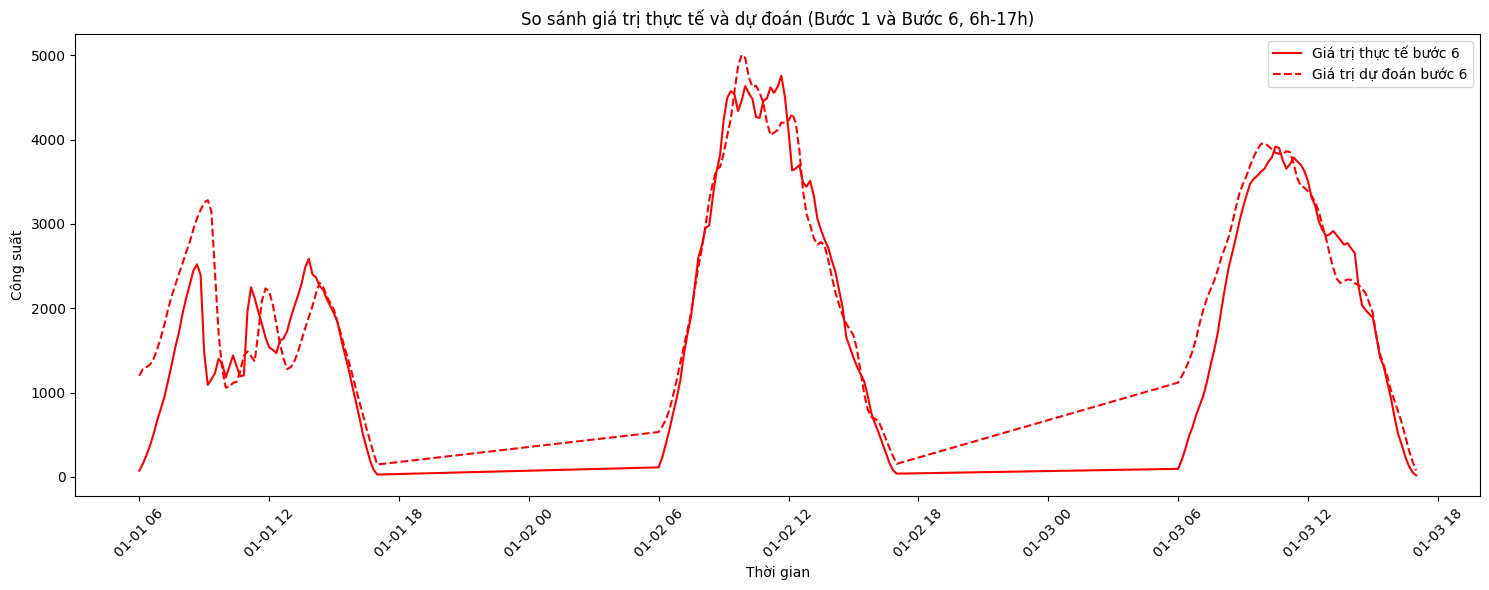

In [12]:
import datetime
start_time = datetime.time(6, 0)
end_time = datetime.time(17, 0)
filtered_times = [t.time() for t in sequences_times]
filtered_indices = [i for i, t in enumerate(filtered_times) if start_time <= t <= end_time]

# Ensure filtered_indices is within bounds
filtered_indices = [i for i in filtered_indices if i < len(true_values)]

filtered_true_values = true_values[filtered_indices]
filtered_predictions = predictions[filtered_indices]
filtered_times = [sequences_times[i] for i in filtered_indices]

plt.figure(figsize=(15, 6))
# plt.plot(filtered_times, filtered_true_values[:, 0], label='Giá trị thực tế bước 1', color='blue')
# plt.plot(filtered_times, filtered_predictions[:, 0], label='Giá trị dự đoán bước 1', color='blue', linestyle='--')
plt.plot(filtered_times, filtered_true_values[:, 2], label='Giá trị thực tế bước 6', color='red')
plt.plot(filtered_times, filtered_predictions[:, 2], label='Giá trị dự đoán bước 6', color='red', linestyle='--')
plt.xlabel('Thời gian')
plt.ylabel('Công suất')
plt.title('So sánh giá trị thực tế và dự đoán (Bước 1 và Bước 6, 6h-17h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Import thư viện và cài đặt

In [60]:
# %% Cell 1: Import thư viện và cài đặt
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

PATH = r"Z:\Sky-image\Data"
POWER_CSV = r"E:\namnvn\H9\Solar_Power_Forecast\data\P_uoc.csv"
SEQ_LENGTH = 12
PRED_LENGTH = 6
IMG_SIZE = (32, 32)
NUM_CHANNELS = 4
BATCH_SIZE = 128
EPOCHS = 20

START_DATE = datetime.datetime(2025, 1, 1)
END_DATE = datetime.datetime(2025, 3, 3)

print("✅ Đã import thư viện và thiết lập cấu hình")

✅ Đã import thư viện và thiết lập cấu hình


Xử lý dữ liệu công suất

In [61]:
# %% Cell 2: Xử lý dữ liệu công suất
print("🔄 Đang load dữ liệu công suất...")
power_df = pd.read_csv(POWER_CSV)
power_df['Time'] = pd.to_datetime(power_df['Time'])
scaler = MinMaxScaler()
power_df['P_uoc_normalized'] = scaler.fit_transform(power_df[['P_uoc']])
power_lookup = power_df.set_index('Time')['P_uoc_normalized'].to_dict()
print(f"✅ Đã load {len(power_df)} bản ghi")

print("Dữ liệu mẫu:", power_df.head())
print("Lookup mẫu:", {k: power_lookup[k] for k in list(power_lookup.keys())[:5]})

🔄 Đang load dữ liệu công suất...
✅ Đã load 8918 bản ghi
Dữ liệu mẫu:                  Time  P_uoc  P_uoc_normalized
0 2025-01-01 00:00:00    0.0               0.0
1 2025-01-01 00:10:00    0.0               0.0
2 2025-01-01 00:20:00    0.0               0.0
3 2025-01-01 00:30:00    0.0               0.0
4 2025-01-01 00:40:00    0.0               0.0
Lookup mẫu: {Timestamp('2025-01-01 00:00:00'): 0.0, Timestamp('2025-01-01 00:10:00'): 0.0, Timestamp('2025-01-01 00:20:00'): 0.0, Timestamp('2025-01-01 00:30:00'): 0.0, Timestamp('2025-01-01 00:40:00'): 0.0}


Định nghĩa hàm xử lý ảnh và chuẩn bị dataset


🔄 Đang xử lý ảnh thành chuỗi dữ liệu multi-channel...
✅ Đã xử lý 8605 chuỗi ảnh
Shape của sequences_images: (8605, 12, 32, 32, 4)
Mẫu đầu tiên (min, max): -1.0 1.0


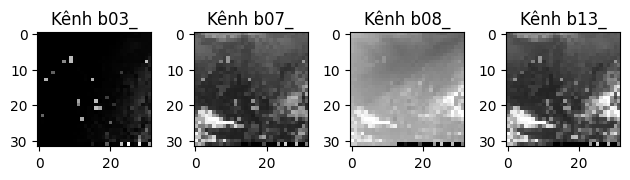

Thời gian mẫu: ['2025-01-01 01:50', '2025-01-01 02:00', '2025-01-01 02:10', '2025-01-01 02:20', '2025-01-01 02:30']


In [51]:
# %% Cell 3.1: Xử lý ảnh thành chuỗi dữ liệu multi-channel
def load_and_process_image(path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False)
        img = tf.image.resize(img, IMG_SIZE)
        img = (img / 127.5) - 1.0
        return img.numpy()
    except:
        return np.zeros(IMG_SIZE + (1,), dtype=np.float32)

def preprocess_images(image_records_dict):
    print("\n🔄 Đang xử lý ảnh thành chuỗi dữ liệu multi-channel...")
    prefixes = ['b03_', 'b07_', 'b08_', 'b13_']
    sequences_images = []
    sequences_times = []
    
    # Tìm thời gian chung
    times = set.intersection(*(set(dt for _, dt in image_records_dict[prefix]) for prefix in prefixes))
    times = sorted(times)
    min_length = len(times) - SEQ_LENGTH - PRED_LENGTH + 1
    
    for i in range(max(0, min_length)):
        time_window = times[i:i+SEQ_LENGTH]
        if len(time_window) != SEQ_LENGTH:  # Bỏ qua nếu không đủ SEQ_LENGTH
            continue
        multi_channel_seq = []
        for prefix in prefixes:
            channel_seq = []
            for t in time_window:
                path = next((p for p, dt in image_records_dict[prefix] if dt == t), None)
                img = load_and_process_image(path) if path else np.zeros(IMG_SIZE + (1,), dtype=np.float32)
                channel_seq.append(img.squeeze())  # Loại bỏ chiều (1)
            multi_channel_seq.append(channel_seq)
        # Stack thành (SEQ_LENGTH, 32, 32, 4)
        stacked_seq = np.stack(multi_channel_seq, axis=-1)
        sequences_images.append(stacked_seq)
        sequences_times.append(time_window[-1])
    
    sequences_images = np.array(sequences_images)
    print(f"✅ Đã xử lý {len(sequences_images)} chuỗi ảnh")
    print("Shape của sequences_images:", sequences_images.shape)
    if sequences_images.size > 0:
        print("Mẫu đầu tiên (min, max):", sequences_images[0].min(), sequences_images[0].max())
    return sequences_images, sequences_times

# Tạo image_records
date_dirs = [d.strftime("%Y%m%d") for d in pd.date_range(START_DATE, END_DATE)]
image_records_dict = {'b03_': [], 'b07_': [], 'b08_': [], 'b13_': []}
for date_dir in date_dirs:
    date_path = os.path.join(PATH, date_dir)
    if os.path.exists(date_path):
        for time_dir in os.listdir(date_path):
            time_path = os.path.join(date_path, time_dir)
            if os.path.isdir(time_path):
                try:
                    dt = datetime.datetime.strptime(f"{date_dir}T{time_dir}", "%Y%m%dT%H%M")
                    for file in os.listdir(time_path):
                        for prefix in image_records_dict.keys():
                            if file.lower().startswith(prefix) and file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                                img_path = os.path.join(time_path, file)
                                image_records_dict[prefix].append((img_path, dt))
                except:
                    continue

for prefix in image_records_dict:
    image_records_dict[prefix].sort(key=lambda x: x[1])

sequences_images_processed, sequences_times = preprocess_images(image_records_dict)

# Kiểm tra
if sequences_images_processed.size > 0:
    for i, prefix in enumerate(['b03_', 'b07_', 'b08_', 'b13_']):
        plt.subplot(1, 4, i+1)
        plt.imshow(sequences_images_processed[0][0, :, :, i], cmap='gray')
        plt.title(f"Kênh {prefix}")
    plt.tight_layout()
    plt.show()
    print("Thời gian mẫu:", [t.strftime('%Y-%m-%d %H:%M') for t in sequences_times[:5]])
else:
    print("⚠️ Không có chuỗi ảnh nào được tạo!")

In [52]:
# %% Cell 3.2: Ghép với P_uoc và tạo dataset
def prepare_dataset_with_processed_images(sequences_images_processed, sequences_times):
    print("\n🔄 Đang ghép dữ liệu ảnh với P_uoc...")
    sequences_p_uoc = []
    targets = []
    valid_sequences_images = []
    valid_sequences_times = []
    for i, (img_seq, seq_time) in enumerate(zip(sequences_images_processed, sequences_times)):
        start_idx = i
        p_uoc_seq = [power_lookup.get(image_records_dict['b03_'][start_idx + j][1], 0.0) for j in range(SEQ_LENGTH)]
        target_dts = [image_records_dict['b03_'][start_idx + SEQ_LENGTH + j][1] for j in range(PRED_LENGTH)]
        target_powers = [power_lookup.get(dt, -1.0) for dt in target_dts]
        if all(power != -1.0 for power in target_powers):
            valid_sequences_images.append(img_seq)
            sequences_p_uoc.append(p_uoc_seq)
            targets.append(target_powers)
            valid_sequences_times.append(seq_time)
    
    print("\nVí dụ đầu vào và đầu ra:")
    print("P_uoc đầu vào:", sequences_p_uoc[0])
    print("P_uoc đầu ra:", targets[0])
    
    ds = tf.data.Dataset.from_tensor_slices((
        (np.array(valid_sequences_images), np.array(sequences_p_uoc)),
        np.array(targets)
    ))
    ds = ds.map(lambda x, y: ((x[0], x[1]), y), num_parallel_calls=tf.data.AUTOTUNE)
    final_ds = ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    print(f"✅ Dataset đã sẵn sàng với {len(valid_sequences_images)} mẫu")
    return final_ds, valid_sequences_times

dataset, sequences_times_train = prepare_dataset_with_processed_images(sequences_images_processed, sequences_times)


🔄 Đang ghép dữ liệu ảnh với P_uoc...

Ví dụ đầu vào và đầu ra:
P_uoc đầu vào: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
P_uoc đầu ra: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
✅ Dataset đã sẵn sàng với 8579 mẫu


Định nghĩa mô hình

In [53]:
# %% Cell 4: Định nghĩa mô hình
def build_model():
    input_images = layers.Input(shape=(SEQ_LENGTH, IMG_SIZE[0], IMG_SIZE[1], NUM_CHANNELS))
    x = layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'))(input_images)
    x = layers.TimeDistributed(layers.MaxPooling2D(2, 2))(x)
    x = layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu'))(x)
    x = layers.TimeDistributed(layers.GlobalAveragePooling2D())(x)
    input_p_uoc = layers.Input(shape=(SEQ_LENGTH,))
    p_uoc_features = layers.Reshape((SEQ_LENGTH, 1))(input_p_uoc)
    combined = layers.Concatenate(axis=-1)([x, p_uoc_features])
    lstm_out = layers.LSTM(128, return_sequences=False)(combined)
    output = layers.Dense(PRED_LENGTH)(lstm_out)
    model = models.Model(inputs=[input_images, input_p_uoc], outputs=output)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    print("✅ Mô hình đã được build")
    model.summary()
    return model

model = build_model()

✅ Mô hình đã được build
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 12, 32, 32, 4)]      0         []                            
                                                                                                  
 time_distributed_48 (TimeD  (None, 12, 30, 30, 32)       1184      ['input_25[0][0]']            
 istributed)                                                                                      
                                                                                                  
 time_distributed_49 (TimeD  (None, 12, 15, 15, 32)       0         ['time_distributed_48[0][0]'] 
 istributed)                                                                                      
                                                                   

Huấn luyện mô hình

✅ Mô hình đã được build
Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 12, 32, 32, 4)]      0         []                            
                                                                                                  
 time_distributed_52 (TimeD  (None, 12, 30, 30, 32)       1184      ['input_27[0][0]']            
 istributed)                                                                                      
                                                                                                  
 time_distributed_53 (TimeD  (None, 12, 15, 15, 32)       0         ['time_distributed_52[0][0]'] 
 istributed)                                                                                      
                                                                   

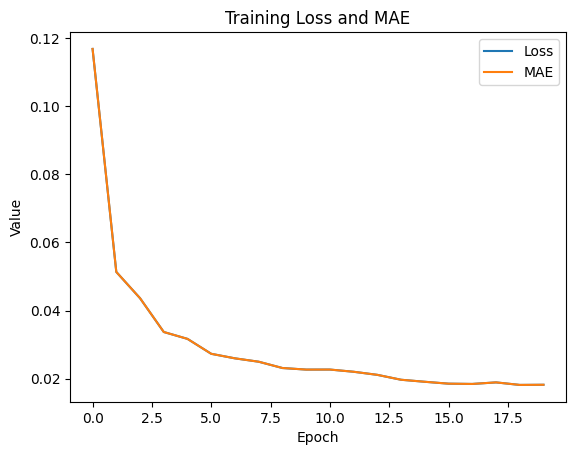

In [54]:
# %% Cell 5: Huấn luyện mô hình
def train_model(dataset):
    model = build_model()
    print("\n🔄 Đang huấn luyện mô hình...")
    history = model.fit(dataset, epochs=EPOCHS, verbose=1)
    print("✅ Huấn luyện hoàn tất")
    return model, history

model, history = train_model(dataset)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and MAE')
plt.legend()
plt.show()

Test model và vẽ dự báo

In [ ]:
# %% Cell 6: Test model
def test_model(model, scaler, test_start_date, test_end_date):
    global START_DATE, END_DATE
    START_DATE, END_DATE = test_start_date, test_end_date
    
    date_dirs = [d.strftime("%Y%m%d") for d in pd.date_range(START_DATE, END_DATE)]
    test_image_records_dict = {'b03_': [], 'b07_': [], 'b08_': [], 'b13_': []}
    for date_dir in date_dirs:
        date_path = os.path.join(PATH, date_dir)
        if os.path.exists(date_path):
            for time_dir in os.listdir(date_path):
                time_path = os.path.join(date_path, time_dir)
                if os.path.isdir(time_path):
                    try:
                        dt = datetime.datetime.strptime(f"{date_dir}T{time_dir}", "%Y%m%dT%H%M")
                        for file in os.listdir(time_path):
                            for prefix in test_image_records_dict.keys():
                                if file.lower().startswith(prefix) and file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                                    img_path = os.path.join(time_path, file)
                                    test_image_records_dict[prefix].append((img_path, dt))
                    except:
                        continue
    for prefix in test_image_records_dict:
        test_image_records_dict[prefix].sort(key=lambda x: x[1])
    
    sequences_images_test, sequences_times_test = preprocess_images(test_image_records_dict)
    test_dataset, sequences_times = prepare_dataset_with_processed_images(sequences_images_test, sequences_times_test)
    
    filtered_indices = [i for i, t in enumerate(sequences_times) if 5 <= t.hour <= 19]
    if not filtered_indices:
        print("⚠️ Không có dữ liệu trong khoảng 5h-19h!")
        return None, None
    
    test_loss, test_mae = model.evaluate(test_dataset, verbose=1)
    print(f"✅ Test Loss: {test_loss}")
    print(f"✅ Test MAE: {test_mae}")
    
    predictions = model.predict(test_dataset)
    true_values = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
    true_values = scaler.inverse_transform(true_values)
    predictions = scaler.inverse_transform(predictions)
    
    filtered_true_values = true_values[filtered_indices]
    filtered_predictions = predictions[filtered_indices]
    filtered_times = [sequences_times[i] for i in filtered_indices]
    
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_times, filtered_true_values[:, 0], label='Giá trị thực tế bước 1', color='blue')
    plt.plot(filtered_times, filtered_predictions[:, 0], label='Giá trị dự đoán bước 1', color='blue', linestyle='--')
    plt.plot(filtered_times, filtered_true_values[:, 5], label='Giá trị thực tế bước 6', color='red')
    plt.plot(filtered_times, filtered_predictions[:, 5], label='Giá trị dự đoán bước 6', color='red', linestyle='--')
    plt.xlabel('Thời gian')
    plt.ylabel('Công suất')
    plt.title('So sánh giá trị thực tế và dự đoán (Bước 1 và Bước 6, 5h-19h)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    def calculate_mape(true, pred):
        mask = true != 0
        return np.mean(np.abs((true[mask] - pred[mask]) / true[mask])) * 100 if mask.any() else float('nan')
    
    mape_step1 = calculate_mape(filtered_true_values[:, 0], filtered_predictions[:, 0])
    mape_step6 = calculate_mape(filtered_true_values[:, 5], filtered_predictions[:, 5])
    
    print(f"✅ Sai số phần trăm (MAPE) bước 1: {mape_step1:.2f}%")
    print(f"✅ Sai số phần trăm (MAPE) bước 6: {mape_step6:.2f}%")
    
    return true_values, predictions

test_start_date = datetime.datetime(2025, 3, 1)
test_end_date = datetime.datetime(2025, 3, 3)
true_values, predictions = test_model(model, scaler, test_start_date, test_end_date)

2024501-20250315

In [ ]:
# %% Cell 1: Import thư viện và cài đặt
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
sys.path.append('P:/7. User/Tuong')

from DB_ALL import SQL_NLTT_NOIBO, Database_TTD

PATH = r"Z:\Sky-image\Data"
POWER_CSV = r"E:\namnvn\H9\Solar_Power_Forecast\data\P_uoc.csv"
SEQ_LENGTH = 12
PRED_LENGTH = 6
IMG_SIZE = (32, 32)
NUM_CHANNELS = 4
BATCH_SIZE = 128
EPOCHS = 30
RATED_POWER = 8900  # Công suất định mức để tính MAPE

START_DATE = datetime.datetime(2024, 5, 1)
END_DATE = datetime.datetime(2025, 3, 15)

print("✅ Đã import thư viện và thiết lập cấu hình")

# %% Cell 2: Xử lý dữ liệu công suất
print("🔄 Đang load dữ liệu công suất...")
# power_df = pd.read_csv(POWER_CSV)
db = SQL_NLTT_NOIBO()
start_date = '2024-05-01'
end_date = '2025-03-15'
# If no end_date provided, query for a single day
df = pd.DataFrame.from_records(db.query(f"""
select NGAY, ID_CHUKY, SUM(P_VALUE) as P from NLTT_REALTIME_LOAIHINH_HIS nrnh 
WHERE NGAY >= '{start_date}' AND NGAY <= '{end_date}' and ID_LOAIHINH = 9
GROUP by NGAY, ID_CHUKY 
ORDER by NGAY, ID_CHUKY
"""), columns=['NGAY', 'ID_CHUKY','P'])

# Create full datetime by combining date and time derived from ID_CHUKY
df["NGAY"] = pd.to_datetime(df["NGAY"])
df["TIME"] = df["NGAY"] + pd.to_timedelta((df["ID_CHUKY"] - 1) * 5, unit='m')
df = df[["TIME", "P"]]
df.rename(columns={"TIME": "Time"}, inplace=True)
# resample to 10 minutes
df = df.set_index("Time").resample('10T').mean()
power_df = df.reset_index()
power_df['Time'] = pd.to_datetime(power_df['Time'])
scaler = MinMaxScaler()
power_df['P_uoc_normalized'] = scaler.fit_transform(power_df[['P_uoc']])
power_lookup = power_df.set_index('Time')['P_uoc_normalized'].to_dict()
print(f"✅ Đã load {len(power_df)} bản ghi")

print("Dữ liệu mẫu:", power_df.head())
print("Lookup mẫu:", {k: power_lookup[k] for k in list(power_lookup.keys())[:5]})

# %% Cell 3.1: Xử lý ảnh thành chuỗi dữ liệu multi-channel
def load_and_process_image(path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False)
        # Tăng cường xử lý ảnh
        img = tf.image.resize(img, IMG_SIZE)
        img = tf.image.per_image_standardization(img)  # Chuẩn hóa từng ảnh
        img = tf.clip_by_value(img, -1.0, 1.0)  # Giới hạn giá trị
        return img.numpy()
    except:
        return np.zeros(IMG_SIZE + (1,), dtype=np.float32)

def preprocess_images(image_records_dict):
    print("\n🔄 Đang xử lý ảnh thành chuỗi dữ liệu multi-channel...")
    prefixes = ['b03_', 'b07_', 'b08_', 'b13_']
    sequences_images = []
    sequences_times = []
    
    # Tìm thời gian chung
    times = set.intersection(*(set(dt for _, dt in image_records_dict[prefix]) for prefix in prefixes))
    times = sorted(times)
    min_length = len(times) - SEQ_LENGTH - PRED_LENGTH + 1
    
    for i in range(max(0, min_length)):
        time_window = times[i:i+SEQ_LENGTH]
        if len(time_window) != SEQ_LENGTH:
            continue
        multi_channel_seq = []
        for prefix in prefixes:
            channel_seq = []
            for t in time_window:
                path = next((p for p, dt in image_records_dict[prefix] if dt == t), None)
                img = load_and_process_image(path) if path else np.zeros(IMG_SIZE + (1,), dtype=np.float32)
                channel_seq.append(img.squeeze())
            multi_channel_seq.append(channel_seq)
        stacked_seq = np.stack(multi_channel_seq, axis=-1)  # Shape: (SEQ_LENGTH, 32, 32, 4)
        sequences_images.append(stacked_seq)
        sequences_times.append(time_window[-1])
    
    sequences_images = np.array(sequences_images)
    print(f"✅ Đã xử lý {len(sequences_images)} chuỗi ảnh")
    print("Shape của sequences_images:", sequences_images.shape)
    if sequences_images.size > 0:
        print("Mẫu đầu tiên (min, max):", sequences_images[0].min(), sequences_images[0].max())
    return sequences_images, sequences_times

# Tạo image_records
date_dirs = [d.strftime("%Y%m%d") for d in pd.date_range(START_DATE, END_DATE)]
image_records_dict = {'b03_': [], 'b07_': [], 'b08_': [], 'b13_': []}
for date_dir in date_dirs:
    date_path = os.path.join(PATH, date_dir)
    if os.path.exists(date_path):
        for time_dir in os.listdir(date_path):
            time_path = os.path.join(date_path, time_dir)
            if os.path.isdir(time_path):
                try:
                    dt = datetime.datetime.strptime(f"{date_dir}T{time_dir}", "%Y%m%dT%H%M")
                    for file in os.listdir(time_path):
                        for prefix in image_records_dict.keys():
                            if file.lower().startswith(prefix) and file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                                img_path = os.path.join(time_path, file)
                                image_records_dict[prefix].append((img_path, dt))
                except:
                    continue

for prefix in image_records_dict:
    image_records_dict[prefix].sort(key=lambda x: x[1])

sequences_images_processed, sequences_times = preprocess_images(image_records_dict)

if sequences_images_processed.size > 0:
    for i, prefix in enumerate(['b03_', 'b07_', 'b08_', 'b13_']):
        plt.subplot(1, 4, i+1)
        plt.imshow(sequences_images_processed[0][0, :, :, i], cmap='gray')
        plt.title(f"Kênh {prefix}")
    plt.tight_layout()
    plt.show()
    print("Thời gian mẫu:", [t.strftime('%Y-%m-%d %H:%M') for t in sequences_times[:5]])
else:
    print("⚠️ Không có chuỗi ảnh nào được tạo!")

# %% Cell 3.2: Ghép với P_uoc và tạo dataset
def prepare_dataset_with_processed_images(sequences_images_processed, sequences_times):
    print("\n🔄 Đang ghép dữ liệu ảnh với P_uoc...")
    sequences_p_uoc = []
    targets = []
    valid_sequences_images = []
    valid_sequences_times = []
    for i, (img_seq, seq_time) in enumerate(zip(sequences_images_processed, sequences_times)):
        p_uoc_seq = [power_lookup.get(seq_time - datetime.timedelta(minutes=10*(SEQ_LENGTH-1-j)), 0.0) for j in range(SEQ_LENGTH)]
        target_dts = [seq_time + datetime.timedelta(minutes=10*(j+1)) for j in range(PRED_LENGTH)]
        target_powers = [power_lookup.get(dt, -1.0) for dt in target_dts]
        if all(power != -1.0 for power in target_powers):
            valid_sequences_images.append(img_seq)
            sequences_p_uoc.append(p_uoc_seq)
            targets.append(target_powers)
            valid_sequences_times.append(seq_time)
    
    print("\nVí dụ đầu vào và đầu ra:")
    if valid_sequences_images:
        print("P_uoc đầu vào:", sequences_p_uoc[0])
        print("P_uoc đầu ra:", targets[0])
    
    ds = tf.data.Dataset.from_tensor_slices((
        (np.array(valid_sequences_images), np.array(sequences_p_uoc)),
        np.array(targets)
    ))
    ds = ds.shuffle(buffer_size=len(valid_sequences_images))
    ds = ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    dataset_size = len(valid_sequences_images)
    train_size = int(0.8 * dataset_size)
    train_dataset = ds.take(train_size)
    val_dataset = ds.skip(train_size)
    
    print(f"✅ Dataset đã sẵn sàng với {dataset_size} mẫu")
    print(f"Train dataset: {train_size} mẫu")
    print(f"Validation dataset: {dataset_size - train_size} mẫu")
    return train_dataset, val_dataset, valid_sequences_times

train_dataset, val_dataset, sequences_times_train = prepare_dataset_with_processed_images(sequences_images_processed, sequences_times)


# %% Cell 4: Định nghĩa mô hình tối ưu (CNN + Transformer)
def build_model():
    # Input layers
    input_images = layers.Input(shape=(SEQ_LENGTH, IMG_SIZE[0], IMG_SIZE[1], NUM_CHANNELS))
    input_p_uoc = layers.Input(shape=(SEQ_LENGTH,))
    
    # CNN để trích xuất đặc trưng không gian
    x = layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))(input_images)
    x = layers.TimeDistributed(layers.MaxPooling2D(2, 2))(x)
    x = layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))(x)
    x = layers.TimeDistributed(layers.MaxPooling2D(2, 2))(x)
    x = layers.TimeDistributed(layers.Flatten())(x)  # Shape: (batch, SEQ_LENGTH, flat_features)
    
    # Ghép với P_uoc
    p_uoc_features = layers.Reshape((SEQ_LENGTH, 1))(input_p_uoc)
    combined = layers.Concatenate(axis=-1)([x, p_uoc_features])  # Shape: (batch, SEQ_LENGTH, flat_features+1)
    
    # Transformer Encoder
    num_transformer_blocks = 2
    d_model = 128
    num_heads = 4
    dff = 256
    
    # Project combined features vào không gian Transformer
    x = layers.Dense(d_model)(combined)  # Shape: (batch, SEQ_LENGTH, d_model)
    for _ in range(num_transformer_blocks):
        # Multi-Head Attention
        attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)(x, x)
        attn_output = layers.Dropout(0.1)(attn_output)
        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)
        
        # Feed Forward
        ff_output = layers.Dense(dff, activation='relu')(x)
        ff_output = layers.Dense(d_model)(ff_output)
        ff_output = layers.Dropout(0.1)(ff_output)
        x = layers.LayerNormalization(epsilon=1e-6)(x + ff_output)
    
    # Global pooling và dự báo
    x = layers.GlobalAveragePooling1D()(x)  # Shape: (batch, d_model)
    output = layers.Dense(PRED_LENGTH, activation='linear')(x)
    
    model = models.Model(inputs=[input_images, input_p_uoc], outputs=output)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    print("✅ Mô hình đã được build")
    model.summary()
    return model

model = build_model()


# %% Cell 5: Huấn luyện mô hình với hình vẽ trực tuyến


class PlotTrainingProgress(Callback):
    def __init__(self):
        super(PlotTrainingProgress, self).__init__()
        plt.ion()  # Bật chế độ tương tác
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(15, 5))
        self.losses = []
        self.val_losses = []
        self.maes = []
        self.val_maes = []
        self.epochs = []
    
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs.append(epoch + 1)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.maes.append(logs.get('mae'))
        self.val_maes.append(logs.get('val_mae'))
        
        # Cập nhật biểu đồ Loss
        self.ax1.clear()
        self.ax1.plot(self.epochs, self.losses, label='Training Loss', color='blue')
        self.ax1.plot(self.epochs, self.val_losses, label='Validation Loss', color='orange')
        self.ax1.set_title('Training and Validation Loss')
        self.ax1.set_xlabel('Epoch')
        self.ax1.set_ylabel('Loss')
        self.ax1.legend()
        self.ax1.grid(True)
        
        # Cập nhật biểu đồ MAE
        self.ax2.clear()
        self.ax2.plot(self.epochs, self.maes, label='Training MAE', color='blue')
        self.ax2.plot(self.epochs, self.val_maes, label='Validation MAE', color='orange')
        self.ax2.set_title('Training and Validation MAE')
        self.ax2.set_xlabel('Epoch')
        self.ax2.set_ylabel('MAE')
        self.ax2.legend()
        self.ax2.grid(True)
        
        self.fig.tight_layout()
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
    
    def on_train_end(self, logs=None):
        plt.ioff()  # Tắt chế độ tương tác khi kết thúc
        plt.show()

def train_model(train_dataset, val_dataset):
    model = build_model()
    print("\n🔄 Đang huấn luyện mô hình...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=EPOCHS,
        verbose=1,
        callbacks=[PlotTrainingProgress()]
    )
    print("✅ Huấn luyện hoàn tất")
    return model, history

model_2, history = train_model(train_dataset, val_dataset)

# %% Cell 6: Test model
def test_model(model, scaler, test_start_date, test_end_date):
    global START_DATE, END_DATE
    START_DATE, END_DATE = test_start_date, test_end_date
    
    date_dirs = [d.strftime("%Y%m%d") for d in pd.date_range(START_DATE, END_DATE)]
    test_image_records_dict = {'b03_': [], 'b07_': [], 'b08_': [], 'b13_': []}
    for date_dir in date_dirs:
        date_path = os.path.join(PATH, date_dir)
        if os.path.exists(date_path):
            for time_dir in os.listdir(date_path):
                time_path = os.path.join(date_path, time_dir)
                if os.path.isdir(time_path):
                    try:
                        dt = datetime.datetime.strptime(f"{date_dir}T{time_dir}", "%Y%m%dT%H%M")
                        for file in os.listdir(time_path):
                            for prefix in test_image_records_dict.keys():
                                if file.lower().startswith(prefix) and file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                                    img_path = os.path.join(time_path, file)
                                    test_image_records_dict[prefix].append((img_path, dt))
                    except:
                        continue
    for prefix in test_image_records_dict:
        test_image_records_dict[prefix].sort(key=lambda x: x[1])
    
    sequences_images_test, sequences_times_test = preprocess_images(test_image_records_dict)
    test_dataset, _, sequences_times = prepare_dataset_with_processed_images(sequences_images_test, sequences_times_test)
    
    filtered_indices = [i for i, t in enumerate(sequences_times) if 5 <= t.hour <= 19]
    if not filtered_indices:
        print("⚠️ Không có dữ liệu trong khoảng 5h-19h!")
        return None, None
    
    test_loss, test_mae = model.evaluate(test_dataset, verbose=1)
    print(f"✅ Test Loss: {test_loss}")
    print(f"✅ Test MAE: {test_mae}")
    
    predictions = model.predict(test_dataset)
    true_values = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
    true_values = scaler.inverse_transform(true_values)
    predictions = scaler.inverse_transform(predictions)
    
    filtered_true_values = true_values[filtered_indices]
    filtered_predictions = predictions[filtered_indices]
    filtered_times = [sequences_times[i] for i in filtered_indices]
    
    # Hàm đánh giá MAE và MAPE
    def calculate_metrics(true, pred, step_name):
        mae = np.mean(np.abs(true - pred))
        mape = np.mean(np.abs((true - pred) / RATED_POWER)) * 100  # MAPE dùng công suất định mức
        print(f"{step_name} - MAE: {mae:.2f}")
        print(f"{step_name} - MAPE: {mape:.2f}%")
        return mae, mape
    
    # Trường hợp 1 bước
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_times, filtered_true_values[:, 0], label='Giá trị thực tế (1 bước)', color='blue')
    plt.plot(filtered_times, filtered_predictions[:, 0], label='Giá trị dự đoán (1 bước)', color='blue', linestyle='--')
    plt.xlabel('Thời gian')
    plt.ylabel('Công suất')
    plt.title('So sánh giá trị thực tế và dự đoán (1 bước, 5h-19h)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    calculate_metrics(filtered_true_values[:, 0], filtered_predictions[:, 0], "1 bước")
    
    # Trường hợp 6 bước
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_times, filtered_true_values[:, 5], label='Giá trị thực tế (6 bước)', color='red')
    plt.plot(filtered_times, filtered_predictions[:, 5], label='Giá trị dự đoán (6 bước)', color='red', linestyle='--')
    plt.xlabel('Thời gian')
    plt.ylabel('Công suất')
    plt.title('So sánh giá trị thực tế và dự đoán (6 bước, 5h-19h)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    calculate_metrics(filtered_true_values[:, 5], filtered_predictions[:, 5], "6 bước")
    
    return true_values, predictions

test_start_date = datetime.datetime(2025, 3, 1)
test_end_date = datetime.datetime(2025, 3, 3)
true_values, predictions = test_model(model_2, scaler, test_start_date, test_end_date)

NameError: name 'sys' is not defined